In [2]:
import pandas as pd

# Re-reading the data from the file
new_file_path = 'productdb.csv'
new_data = pd.read_csv(new_file_path)

# Conducting a comprehensive analysis of the new data

# 1. Descriptive Statistics
# Numerical data summary
numerical_summary = new_data.describe()

# Categorical data frequency distribution
categorical_columns = new_data.select_dtypes(include=['object']).columns
categorical_summary = new_data[categorical_columns].describe()

# 2. Data Quality Check
# Missing values
missing_values = new_data.isnull().sum()

# 3. Unique Values Analysis
unique_values = new_data.nunique()

# Compiling the analysis results
comprehensive_analysis = {
    "Numerical Summary": numerical_summary,
    "Categorical Summary": categorical_summary,
    "Missing Values": missing_values,
    "Unique Values": unique_values
}

comprehensive_analysis

{'Numerical Summary':                  id          year
 count  44419.000000  44418.000000
 mean   29695.850177   2012.806430
 std    17050.002202      2.126489
 min     1163.000000   2007.000000
 25%    14768.500000   2011.000000
 50%    28617.000000   2012.000000
 75%    44685.000000   2015.000000
 max    60000.000000   2019.000000,
 'Categorical Summary':        gender masterCategory subCategory articleType baseColour  season  \
 count   44419          44419       44419       44419      44404   44398   
 unique      5              7          45         142         46       4   
 top       Men        Apparel     Topwear     Tshirts      Black  Summer   
 freq    22142          21392       15398        7066       9727   21470   
 
          usage            productDisplayName  \
 count    44102                         44412   
 unique       8                         31116   
 top     Casual  Lucera Women Silver Earrings   
 freq     34401                            82   
 
           

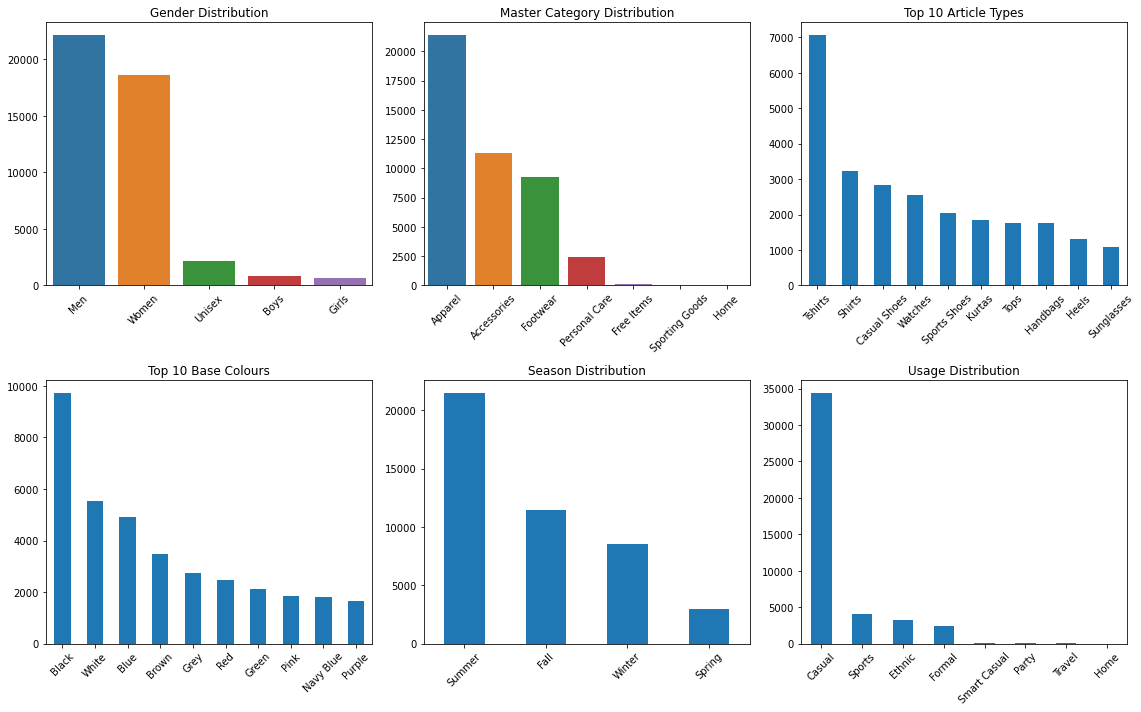

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Exploratory Data Analysis

# 1. Gender Distribution
gender_distribution = new_data['gender'].value_counts()

# 2. Master Category Distribution
master_category_distribution = new_data['masterCategory'].value_counts()

# 3. Sub Category Distribution
sub_category_distribution = new_data['subCategory'].value_counts()

# 4. Article Type Distribution
article_type_distribution = new_data['articleType'].value_counts().head(10)  # Top 10

# 5. Base Colour Distribution
base_colour_distribution = new_data['baseColour'].value_counts().head(10)  # Top 10

# 6. Season Distribution
season_distribution = new_data['season'].value_counts()

# 7. Usage Distribution
usage_distribution = new_data['usage'].value_counts()

# Plotting some of these distributions
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.barplot(x=master_category_distribution.index, y=master_category_distribution.values)
plt.title('Master Category Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
article_type_distribution.plot(kind='bar')
plt.title('Top 10 Article Types')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
base_colour_distribution.plot(kind='bar')
plt.title('Top 10 Base Colours')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
season_distribution.plot(kind='bar')
plt.title('Season Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
usage_distribution.plot(kind='bar')
plt.title('Usage Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

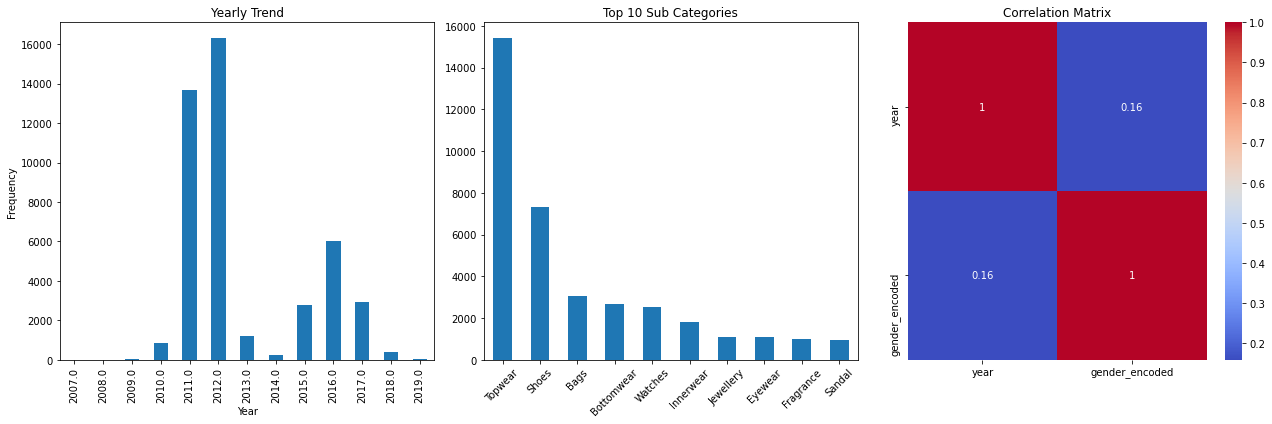

In [4]:
# 8. Yearly Trend Analysis
yearly_distribution = new_data['year'].value_counts().sort_index()

# 9. Top 10 Sub Categories
top_10_sub_categories = sub_category_distribution.head(10)

# 10. Checking for any interesting correlations
# For simplicity, we'll focus on numerical columns and 'gender' as a categorical column
# Encoding 'gender' for correlation analysis
new_data['gender_encoded'] = new_data['gender'].astype('category').cat.codes
correlation_data = new_data[['year', 'gender_encoded']]
correlation_matrix = correlation_data.corr()

# Plotting the additional explorations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
yearly_distribution.plot(kind='bar')
plt.title('Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
top_10_sub_categories.plot(kind='bar')
plt.title('Top 10 Sub Categories')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()